In [1]:
import yfinance as yf
from config import *
import os
import sys
import pandas as pd
import os
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
print("libraries loaded.")

libraries loaded.


In [2]:
yf.__version__

'0.1.54'

In [3]:
rolling_mean_size = 20

In [4]:
df_stock_codes = pd.read_csv(SandP_stockcodes_filename)
df_stock_codes


,Symbol
0,MMM
1,ABT
2,ABBV
3,ABMD
4,ACN
...,...
500,YUM
501,ZBRA
502,ZBH
503,ZION


In [5]:
today_date = datetime.today().strftime('%Y-%m-%d')
today_minus_6Mo_date = (datetime.today() - timedelta(6*365/12)).strftime('%Y-%m-%d')
print("today_date:", today_date)
print("today_minus_6Mo_date:", today_minus_6Mo_date)

today_date: 2020-05-03
today_minus_6Mo_date: 2019-11-02


In [6]:
def Bolinger_Bands(stock_price, window_size=20, num_of_std=2):
    '''
    stock_price : Pandas Series (single column dataframe)
    window_size : typically 20 periods.
    num_of_std  : typically 2 std dev
    https://www.investopedia.com/articles/technical/102201.asp
    '''

    rolling_mean = stock_price.rolling(window=window_size).mean()
    rolling_std  = stock_price.rolling(window=window_size).std()
    upper_band = rolling_mean + (rolling_std*num_of_std)
    lower_band = rolling_mean - (rolling_std*num_of_std)

    return rolling_mean, upper_band, lower_band

In [7]:
for index, row in df_stock_codes.iterrows():
    #ticker_code = row['Symbol']
    #temp for demo
    #ticker_code = "AUDUSD%3DX"
    ticker_code = "ABBV"
    print("getting data for code='"+ticker_code+"'")
    yf_ticker = yf.Ticker(ticker_code)
    try:
        ticker_info = yf_ticker.info
        print(ticker_info)
    except: # catch *all* exceptions
        e = sys.exc_info()[0]
        print( "Error: %s:" % e )
    try:
        cal_events = yf_ticker.calendar
        print(cal_events)
    except: # catch *all* exceptions
        e = sys.exc_info()[0]
        print( "Error: %s:" % e )
    try:
        
        df = yf.download(ticker_code, 
                      start=today_minus_6Mo_date, 
                      end=today_date, 
                      progress=False)
        print("df=\n", df)
    except: # catch *all* exceptions
        e = sys.exc_info()[0]
        print( "Error: %s:" % e )
    break
    


getting data for code='ABBV'
{'zip': '60064', 'sector': 'Healthcare', 'fullTimeEmployees': 30000, 'longBusinessSummary': "AbbVie Inc., a research-based biopharmaceutical company, develops and markets pharmaceutical products in the United States, Japan, Germany, Canada, France, Spain, Italy, the Netherlands, the United Kingdom, Brazil, and internationally. The company offers HUMIRA, a biologic therapy administered as an injection for autoimmune and intestinal diseases; SKYRIZI to treat moderate to severe plaque psoriasis in adults; RINVOQ, a JAK inhibitor for the treatment of moderate to severe active rheumatoid arthritis in adult patients; IMBRUVICA to treat adult patients with chronic lymphocytic leukemia (CLL), small lymphocytic lymphoma (SLL), mantle cell lymphoma, waldenström's macroglobulinemia, marginal zone lymphoma, and chronic graft versus host disease; VENCLEXTA, a BCL-2 inhibitor used to treat adults with CLL or SLL; VIEKIRA PAK, an interferon-free therapy to treat adults wi

In [8]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-01,80.029999,82.180000,79.129997,81.750000,79.474953,13354000
2019-11-04,82.949997,83.320000,82.139999,82.989998,80.680443,9127900
2019-11-05,83.169998,83.400002,81.470001,81.839996,79.562439,7475600
2019-11-06,81.769997,82.250000,80.349998,82.080002,79.795769,9303600
2019-11-07,82.209999,82.589996,81.080002,82.010002,79.727715,6561500
...,...,...,...,...,...,...
2020-04-27,84.029999,84.919998,83.779999,84.690002,84.690002,9209700
2020-04-28,85.699997,85.970001,82.370003,82.760002,82.760002,8341000
2020-04-29,83.720001,84.750000,82.139999,83.760002,83.760002,8231700


In [9]:
df_close = df[['Adj Close']]
df_close

,Adj Close
Date,
2019-11-01,79.474953
2019-11-04,80.680443
2019-11-05,79.562439
2019-11-06,79.795769
2019-11-07,79.727715
...,...
2020-04-27,84.690002
2020-04-28,82.760002
2020-04-29,83.760002


In [10]:
#Bolinger_Bands(stock_price, window_size=20, num_of_std=2):
rolling_mean, upper_band, lower_band = Bolinger_Bands(df_close, window_size=rolling_mean_size)

In [11]:
plot_df = pd.concat([df_close, rolling_mean, upper_band, lower_band], axis=1)
plot_df.columns = ['close', 'rolling_mean', 'upper_band', 'lower_band']
plot_df

,close,rolling_mean,upper_band,lower_band
Date,,,,
2019-11-01,79.474953,NaN,NaN,NaN
2019-11-04,80.680443,NaN,NaN,NaN
2019-11-05,79.562439,NaN,NaN,NaN
2019-11-06,79.795769,NaN,NaN,NaN
2019-11-07,79.727715,NaN,NaN,NaN
...,...,...,...,...
2020-04-27,84.690002,78.863332,87.302510,70.424154
2020-04-28,82.760002,79.294614,87.596731,70.992498
2020-04-29,83.760002,79.729094,88.009886,71.448303


In [12]:
plot_df['upper_breakout']= plot_df['close']>=plot_df['upper_band']
plot_df['lower_breakout']= plot_df['close']<=plot_df['lower_band']

In [13]:
#BollingerBandwidth = (Top BollingerBand - Bottom BollingerBand) / Simple Moving Average
boll_band_width = (plot_df['upper_band']-plot_df['lower_band'])/plot_df['rolling_mean']

In [14]:
#drop xx rows from start of temp dataframe because indicators not calculated.
plot_df = plot_df.iloc[rolling_mean_size:]

In [15]:
plot_df.head()

,close,rolling_mean,upper_band,lower_band,upper_breakout,lower_breakout
Date,,,,,,
2019-12-02,84.608009,83.861387,88.345304,79.377470,False,False
2019-12-03,83.558067,84.005268,88.236997,79.773539,False,False
2019-12-04,84.773277,84.265810,87.952321,80.579299,False,False
2019-12-05,84.306641,84.491354,87.519545,81.463162,False,False
2019-12-06,84.559410,84.732938,86.769568,82.696309,False,False


'''

# notes on trade signal logic
- crosses rolling average upwards
- crosses rolling average downwards
- crosses lower bollinger band upwards
- crosses lower bollinger band downwards
- crosses upper bollinger band downwards
- crosses upper bollinger band upwards
- bollinger band width ratio growing
- bollinger band width ratio reducing
- bollinger band width ratio is minimum for period x (6 months?)
 
---------------------------------------------------------
if last breakout is "crosses lower bollinger band upwards" 
and 
current period is "crosses rolling average upwards" 
then buy signal. 
(probably too early to buy?)

---------------------------------------------------------
if last breakout is "crosses lower bollinger band upwards" 
and 
current period is "crosses upper bollinger band upwards" 
then buy signal.(probably too late to buy?) 

---------------------------------------------------------
if last breakout is "crosses upper bollinger band downwards" 
and 
current period is "crosses rolling average downwards" 
then sell signal. 
(probably too early to sell?)

---------------------------------------------------------
if last  breakout is "crosses rolling average downwards" 
and 
current period is "crosses lower bollinger band downwards" 
then sell signal.(probably too late to sell?) 

---------------------------------------------------------

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html 

http://jonathansoma.com/lede/foundations/classes/pandas%20columns%20and%20functions/apply-a-function-to-every-row-in-a-pandas-dataframe/
'''

In [16]:
'''
last_boll_breakout = +2 : upwards through upper bollinger band 
last_boll_breakout = +1 : upwards through lower bollinger band 
last_boll_breakout =  0 : neutral starting point.
last_boll_breakout = -1 : downwards through upper bollinger band 
last_boll_breakout = -2 : downwards through lower bollinger band 
#
#
last_avg_breakout = -1 : downwards through rolling average
last_avg_breakout =  0 : neutral starting point.
last_avg_breakout = +1 : upwards through rolling average

#
if last_boll_breakout = +1 & last_avg_breakout = +1 : buy signal
if last_boll_breakout = +2 & last_avg_breakout = +1 : strong buy signal.
if last_boll_breakout = -1 & last_avg_breakout = -1 : sell signal.
if last_boll_breakout = -2 & last_avg_breakout = -1 : strong sell signal.

other combinations are not buy or sell signals. (?)

'''

'\nlast_boll_breakout = +2 : upwards through upper bollinger band \nlast_boll_breakout = +1 : upwards through lower bollinger band \nlast_boll_breakout =  0 : neutral starting point.\nlast_boll_breakout = -1 : downwards through upper bollinger band \nlast_boll_breakout = -2 : downwards through lower bollinger band \n#\n#\nlast_avg_breakout = -1 : downwards through rolling average\nlast_avg_breakout =  0 : neutral starting point.\nlast_avg_breakout = +1 : upwards through rolling average\n\n#\nif last_boll_breakout = +1 & last_avg_breakout = +1 : buy signal\nif last_boll_breakout = +2 & last_avg_breakout = +1 : strong buy signal.\nif last_boll_breakout = -1 & last_avg_breakout = -1 : sell signal.\nif last_boll_breakout = -2 & last_avg_breakout = -1 : strong sell signal.\n\nother combinations are not buy or sell signals. (?)\n\n'

In [20]:
last_boll_breakout = 0 
last_avg_breakout = 0  
for i in range(20, len(plot_df.index)):
    #print("i:"+str(i))
    #print(plot_df.iloc[i]['upper_breakout'], plot_df.iloc[i]['lower_breakout'])
    if not plot_df.iloc[i-1]['upper_breakout'] and plot_df.iloc[i]['upper_breakout']:
        print("upper breakout occurred @ i="+str(i)+" on "+plot_df.index[i].strftime('%Y-%m-%d'))
        plot_df.loc[plot_df.index[i].strftime('%Y-%m-%d'), 'breakout'] = plot_df.iloc[i]['close']
        last_boll_breakout = 2
    #
    if not plot_df.iloc[i-1]['lower_breakout'] and plot_df.iloc[i]['lower_breakout']:
        print("lower breakout occurred @ i="+str(i)+" on "+str(plot_df.index[i].strftime('%Y-%m-%d')))
        plot_df.loc[plot_df.index[i].strftime('%Y-%m-%d'), 'breakout'] = plot_df.iloc[i]['close']
        last_boll_breakout = -2
    #
    #
    if plot_df.iloc[i-1]['upper_breakout'] and not plot_df.iloc[i]['upper_breakout']:
        print("upper break_in occurred @ i="+str(i)+" on "+str(plot_df.index[i].strftime('%Y-%m-%d')))
        plot_df.loc[plot_df.index[i].strftime('%Y-%m-%d'), 'breakout'] = plot_df.iloc[i]['close']
        last_boll_breakout = -1
    #
    if plot_df.iloc[i-1]['lower_breakout'] and not plot_df.iloc[i]['lower_breakout']:
        print("lower break_in occurred @ i="+str(i)+" on "+str(plot_df.index[i].strftime('%Y-%m-%d')))
        plot_df.loc[plot_df.index[i].strftime('%Y-%m-%d'), 'breakout'] = plot_df.iloc[i]['close']
        last_boll_breakout = 1
    #
    if (plot_df.iloc[i]['close'] > plot_df.iloc[i]['rolling_mean']) \
        and (plot_df.iloc[i-1]['close'] <= plot_df.iloc[i-1]['rolling_mean']):
        print("break above rolling mean occurred @ i="+str(i)+" on "+plot_df.index[i].strftime('%Y-%m-%d'))
        plot_df.loc[plot_df.index[i].strftime('%Y-%m-%d'), 'breakout'] = plot_df.iloc[i]['close']
        last_avg_breakout = 1
    #
    if (plot_df.iloc[i]['close'] < plot_df.iloc[i]['rolling_mean']) \
        and (plot_df.iloc[i-1]['close'] >= plot_df.iloc[i-1]['rolling_mean']):
        print("break under rolling mean occurred @ i="+str(i)+" on "+plot_df.index[i].strftime('%Y-%m-%d'))
        plot_df.loc[plot_df.index[i].strftime('%Y-%m-%d'), 'breakout'] = plot_df.iloc[i]['close']
        last_avg_breakout = -1
        #
    #if last_boll_breakout = +1 & last_avg_breakout = +1 : buy signal
    if last_boll_breakout==1 and last_avg_breakout==1:
        print("buy signal on "+plot_df.index[i].strftime('%Y-%m-%d'))
        plot_df.loc[plot_df.index[i].strftime('%Y-%m-%d'), 'buy'] = plot_df.iloc[i]['close']
    #if last_boll_breakout = +2 & last_avg_breakout = +1 : strong buy signal.
    if last_boll_breakout==2 and last_avg_breakout==1:
        print("strng buy signal on "+plot_df.index[i].strftime('%Y-%m-%d'))
        plot_df.loc[plot_df.index[i].strftime('%Y-%m-%d'), 'strong_buy'] = plot_df.iloc[i]['close']
    #if last_boll_breakout = -1 & last_avg_breakout = -1 : sell signal.
    if last_boll_breakout==-1 and last_avg_breakout==-1:
        print("sell signal on "+plot_df.index[i].strftime('%Y-%m-%d'))
        plot_df.loc[plot_df.index[i].strftime('%Y-%m-%d'), 'sell'] = plot_df.iloc[i]['close']
    #if last_boll_breakout = -2 & last_avg_breakout = -1 : strong sell signal.
    if last_boll_breakout==-2 and last_avg_breakout==1:
        print("strong sell signal on "+plot_df.index[i].strftime('%Y-%m-%d'))
        plot_df.loc[plot_df.index[i].strftime('%Y-%m-%d'), 'strong_sell'] = plot_df.iloc[i]['close']





break under rolling mean occurred @ i=27 on 2020-01-10
break above rolling mean occurred @ i=29 on 2020-01-14
break under rolling mean occurred @ i=32 on 2020-01-17
lower breakout occurred @ i=35 on 2020-01-23
lower break_in occurred @ i=39 on 2020-01-29
lower breakout occurred @ i=40 on 2020-01-30
lower break_in occurred @ i=42 on 2020-02-03
break above rolling mean occurred @ i=44 on 2020-02-05
buy signal on 2020-02-05
buy signal on 2020-02-06
upper breakout occurred @ i=46 on 2020-02-07
strng buy signal on 2020-02-07
strng buy signal on 2020-02-10
strng buy signal on 2020-02-11
strng buy signal on 2020-02-12
upper break_in occurred @ i=50 on 2020-02-13
break under rolling mean occurred @ i=57 on 2020-02-25
sell signal on 2020-02-25
sell signal on 2020-02-26
sell signal on 2020-02-27
sell signal on 2020-02-28
sell signal on 2020-03-02
sell signal on 2020-03-03
break above rolling mean occurred @ i=63 on 2020-03-04
break under rolling mean occurred @ i=64 on 2020-03-05
sell signal on 

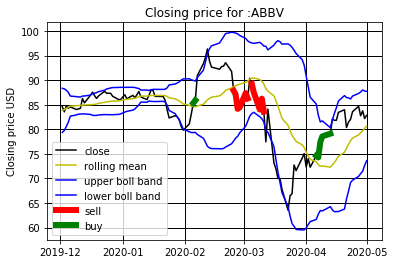

In [21]:
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html
#plot_df.drop(['breakout', 'sell', 'buy'], axis=1).plot()
#plot_df.plot()
#plot_df.drop(['close', 'rolling_mean', 'upper_band', 'lower_band', 'breakout'], axis=1).plot(markersize=12)
#plot_df['breakout'].plot(linewidth=6)
plt.plot(plot_df.index, plot_df['close'], color='k')
plt.plot(plot_df.index, plot_df['rolling_mean'], color='y')
plt.plot(plot_df.index, plot_df['upper_band'], color='b')
plt.plot(plot_df.index, plot_df['lower_band'], color='b')
#plt.plot(plot_df.index, plot_df['breakout'], linewidth=6)
plt.plot(plot_df.index, plot_df['sell'], linewidth=6, color='red')
plt.plot(plot_df.index, plot_df['buy'], linewidth=6, color='green')
plt.legend(['close', 'rolling mean', 'upper boll band', 'lower boll band', 'sell', 'buy'])
#plot_df[['close', 'rolling_mean', 'upper_band', 'lower_band']].plot()
#plt.plot(plot_df['breakout'].dropna(), 'mo')
#plt.plot(plot_df['sell'].dropna(), linestyle='--', marker='o', color='y')
#plt.plot(plot_df['buy'].dropna(), 'mo')
plt.title("Closing price for :"+ticker_code)
plt.grid(b=True, which='major', axis='both', color='k', linestyle='-', linewidth=1 )
plt.ylabel("Closing price USD")
plt.savefig(ticker_code+'_close_bollinger_breakouts.png')
plt.show()